In [1]:
import numpy as np
import os
import argparse
import random
import math
import json
import numpy as np
import scipy
import matplotlib.pylab as plt
import math
import copy
import random
import os
from random import randrange

# Comparing Performence of GAdaOFUL with CW-OFUL
adapted from: https://github.com/uclaml/CW-OFUL/blob/main/Corruption.ipynb

In [2]:
def init_vector(dim, norm): # initalizing vector
  vec = 2 * np.random.rand(dim) - 1.
  return vec * norm / math.sqrt(dim) # normalize



In [3]:
def init_arms(dim, norm, num):
  decision = np.random.rand(num, dim)
  for i in range(num):
    decision[i] = init_vector(dim, norm)
  return decision

In [4]:
dim = 5
sigma= 0.1
corruption = 0
T= 10000
repeat = 1000
actions = 20
norm = 1
bmu = np.ones(dim)/ math.sqrt(dim) # unknown environment parameter

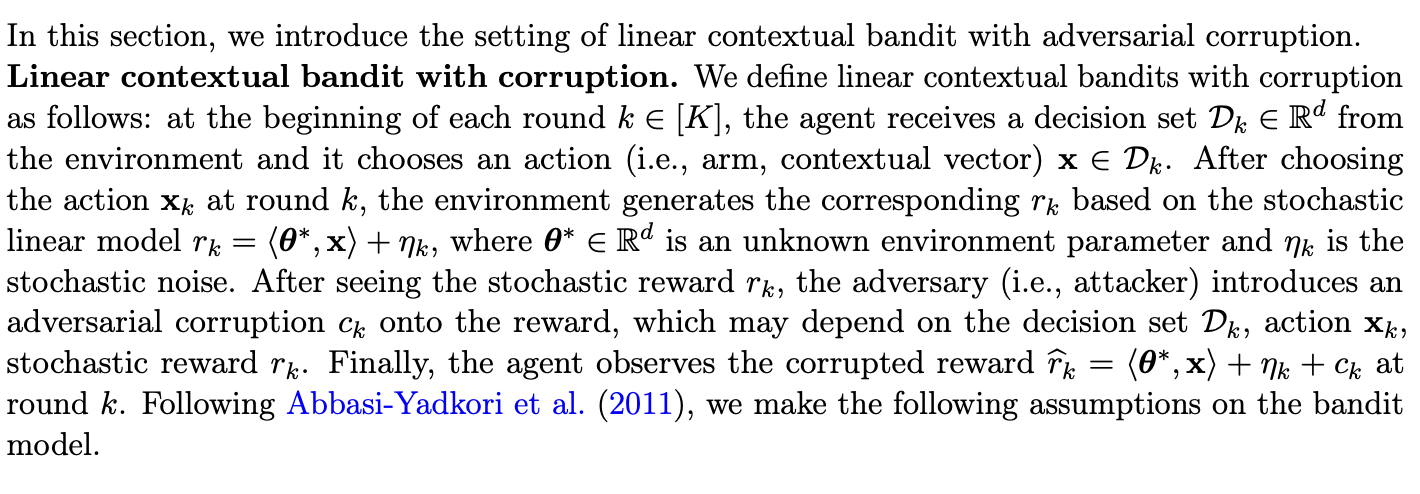

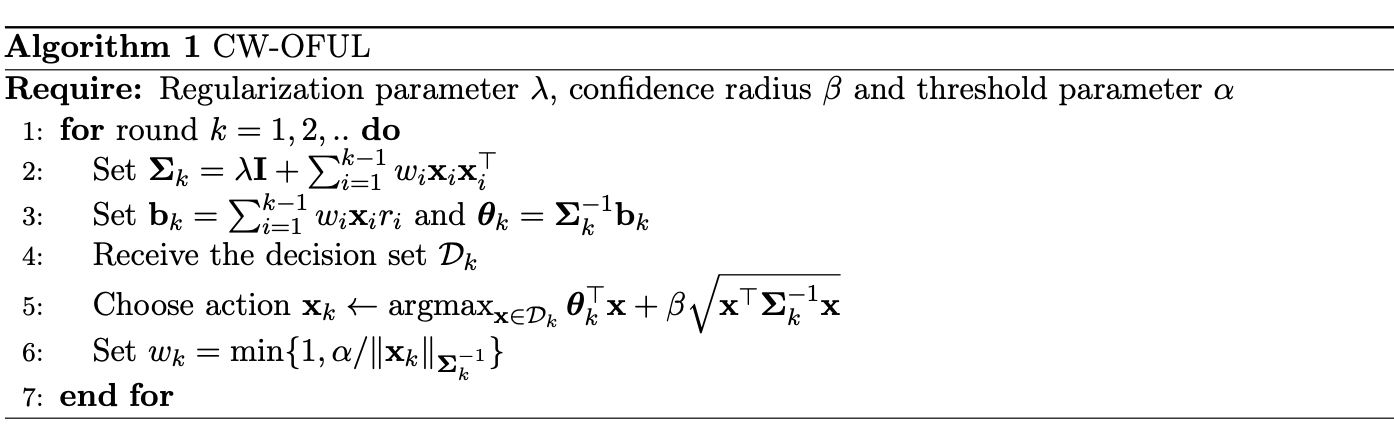

In [26]:
for jjjj in range(repeat):
    ############tabular###################
    corruption =int(jjjj /100)*50 # corruption level
    number =  jjjj-100*int(jjjj /100)
    print(corruption, number)
    cur_crr = 0
    decision_t = init_arms(dim, norm, actions)
    ############Corruption OFUL###################
    LAMBDA = 1 # Regularization parameter
    beta=1.5 # Confidence radius
    alpha=0.2 # threshold parameter

    SIGMA = LAMBDA*np.diag(np.ones(dim))
    BB = np.zeros(dim)
    REGRET = 0
    TOTALREGRET = []
    for t in range(T):
        weight = 1
        noise=np.random.randn(actions) * sigma # sub-gaussian noise
        flag = 0
        if cur_crr < corruption:
            decision = init_arms(dim, norm, actions)
            if cur_crr < corruption:
                flag = 1
        else:
            decision = decision_t
        decision = init_arms(dim, norm, actions)
        rewardS = np.random.randn(actions) # sub-gaussian
        reward = np.random.randn(actions) # sub-gaussian
        optimal_reward = float("-inf")
        for arm in range(actions):
            rewardS[arm] = noise[arm] + np.dot(decision[arm], bmu)
            reward[arm] = rewardS[arm]
            if np.dot(decision[arm], bmu) > optimal_reward:
                optimal_reward = np.dot(decision[arm], bmu) # set optimal reward
        if flag == 1:
            cur_crr += 1
            for arm in range(actions):
                reward[arm] = noise[arm] - np.dot(decision[arm], bmu) # corruption
        # CW-OFUL parameter calculation
        hattheta = np.linalg.lstsq(SIGMA[:,:], BB[:], rcond=-1)
        hattheta = hattheta[0]
        hattheta.shape = (dim)
        MAX_R = float("-inf")
        for a_t in range(actions):
            action_t = decision[a_t]
            UU=np.linalg.lstsq(SIGMA[:,:], action_t, rcond=-1)
            UU= UU[0]
            UU.shape = (dim)
            r_action_t = np.dot(action_t, hattheta) + beta * np.sqrt(np.dot(UU,action_t))
            if MAX_R < r_action_t:
                MAX_R = r_action_t
                final_a_t = a_t
                action = action_t
                weight = min(1,alpha/np.sqrt(np.dot(UU,action_t)))
        REGRET += optimal_reward - np.dot(action, bmu)
        SIGMA[:,:]  = SIGMA[:,:] + weight*np.mat(action).T * np.mat(action)
        BB[:] = BB[:] + weight*reward[final_a_t] * action
        TOTALREGRET.append(REGRET)
    path  = "AdditiveC_lowerbound_" + str(number) +"_"+ str(corruption)+".txt"
    fr = open(path,'w')
    for i in TOTALREGRET:
        fr.write(str(i))
        fr.write("\n")
    fr.close()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
50 0
50 1
50 2
50 3
50 4
50 5
50 6
50 7
50 8
50 9
50 10
50 11
50 12
50 13
50 14
50 15
50 16
50 17
50 18
50 19
50 20
50 21
50 22
50 23
50 24
50 25
50 26
50 27
50 28
50 29
50 30
50 31
50 32
50 33
50 34
50 35
50 36
50 37
50 38
50 39
50 40
50 41
50 42
50 43
50 44
50 45
50 46
50 47
50 48
50 49
50 50
50 51
50 52
50 53
50 54
50 55
50 56
50 57
50 58
50 59
50 60
50 61
50 62
50 63
50 64
50 65
50 66
50 67
50 68
50 69
50 70
50 71
50 72
50 73
50 74
50 75
50 76
50 77
50 78
50 79
50 80
50 81
50 82
50 83
50 84
50 85
50 8

In [ ]:
from scipy.optimize import minimize


for jjjj in range(repeat):
    ############tabular###################
    corruption =int(jjjj /100)*50 # corruption level
    number =  jjjj-100*int(jjjj /100)
    print(corruption, number)
    cur_crr = 0
    decision_t = init_arms(dim, norm, actions)
    ############Ada OFUL###################
    # parameters
    delta = 0.01
    c0 = 1 / (6 * np.sqrt(3 * np.log(2 * T**2 / delta)))
    c1 = 1 / (42 * np.log(2 * T**2 / delta))
    sigma_min = 1 / np.sqrt(T)
    B_init = 1
    L = 1
    LAMBDA = dim / B_init ** 2
    kappa = dim * np.log(1 + T * L**2 / (dim * sigma_min**2))

    # initialization
    beta_t = np.sqrt(LAMBDA) * B_init
    theta_t = np.zeros(dim)
    H_t = LAMBDA * np.eye(dim)
    tau_0 = max(np.sqrt(2* kappa), 2* np.sqrt(dim)) / np.sqrt(np.log((2 * T**2)/delta))

    # Pseudo-Huber loss
    def pseudo_huber(x, tau):
      return tau * (np.sqrt(x**2 + tau**2) - tau)

    # Objective function
    def objective_function(theta, LAMBDA, action, y, sigma, tau, t):
      regularization_term = (LAMBDA / 2) * np.linalg.norm(theta)**2
      loss_sum = 0
      for s in range(t):
        z_s = (y[s] - np.dot(action[s], theta)) / sigma[s]
        loss_sum += pseudo_huber(z_s, tau[s])
      return regularization_term + loss_sum

    def mahalanobis_distance(theta, theta_t_minus_1, H_t_minus_1):
      diff = theta - theta_t_minus_1
      return np.sqrt(np.dot(np.dot(diff.T, H_t_minus_1), diff))

    def confidence_constraint(theta, theta_t_minus_1, H_t_minus_1, beta_t_minus_1):
      return beta_t_minus_1 - mahalanobis_distance(theta, theta_t_minus_1, H_t_minus_1)

    def objective_function_action(theta, action):
      return -np.dot(action, theta)

    REGRET = 0
    TOTALREGRET = []
    reward_list = []
    sigma_list = []
    tau_list = []
    action_list = []
    for t in range(T):
        noise=np.random.randn(actions) * sigma # sub-gaussian noise, variance is sigma
        flag = 0
        if cur_crr < corruption:
            decision = init_arms(dim, norm, actions)
            if cur_crr < corruption:
                flag = 1
        else:
            decision = decision_t
        decision = init_arms(dim, norm, actions)
        rewardS = np.random.randn(actions) # sub-gaussian
        reward = np.random.randn(actions) # sub-gaussian
        optimal_reward = float("-inf")
        for arm in range(actions):
            rewardS[arm] = noise[arm] + np.dot(decision[arm], bmu)
            reward[arm] = rewardS[arm]
            if np.dot(decision[arm], bmu) > optimal_reward:
                optimal_reward = np.dot(decision[arm], bmu) # set optimal reward
        if flag == 1:
            cur_crr += 1
            for arm in range(actions):
                reward[arm] = noise[arm] - np.dot(decision[arm], bmu) # corruption

        ## AdaOFUL
        MAX_R = float("-inf")
        bounds = [(-B_init, B_init)] * dim
        for a_t in range(actions):
            action_t = decision[a_t]
            theta_initial = np.zeros(dim)
            result = minimize(objective_function_action, theta_initial, args=(action_t,),
                              bounds=bounds,
                              constraints={'type': 'ineq', 'fun': confidence_constraint,
                                           'args': (theta_t, H_t, beta_t)})
            r_action_t = result.fun
            if MAX_R < r_action_t:
                MAX_R = r_action_t
                final_a_t = a_t
                action = action_t

        # Calculate sigma_t, w_t, tau_t using Eq (3.4)
        H_t_minus_1_inv = np.linalg.inv(H_t)
        phi_t_norm = np.sqrt(np.dot(np.dot(action.T, H_t_minus_1_inv), action))
        sigma_t = max(sigma, sigma_min, phi_t_norm / c0, \
                  (np.sqrt(L * B_init * phi_t_norm) ) / np.sqrt(np.sqrt(c1 * dim)))
        w_t = phi_t_norm / abs(sigma_t)
        tau_t =  tau_0 * (np.sqrt(1 + w_t **2) / w_t)

        # list
        reward_list.append(reward[final_a_t])
        sigma_list.append(sigma_t)
        tau_list.append(tau_t)
        action_list.append(action)

        # Loss function
        result = minimize(objective_function, theta_t, args=(LAMBDA, action_list, reward_list, sigma_list, tau_list, t))
        theta_t = result.x

        # H_t, beta_t
        H_t = H_t + np.outer(action, action) / sigma_t
        beta_t = 32 * (kappa / tau_0 + np.sqrt(kappa * np.log((2 * t**2) / delta) + tau_0 * np.log((2 * t**2)/ delta))) + 5 * np.sqrt(LAMBDA) *B_init

        # Calculate and store the regret
        REGRET += optimal_reward - np.dot(action, bmu)
        TOTALREGRET.append(REGRET)

    path = 'GAdaOFUL_' + str(number) +"_"+ str(corruption)+".txt"
    fr = open(path,'w')
    for i in TOTALREGRET:
        fr.write(str(i))
        fr.write("\n")
    fr.close()

0 0


<ipython-input-8-a462e55e73f7>:116: RuntimeWarning: divide by zero encountered in log
  beta_t = 32 * (kappa / tau_0 + np.sqrt(kappa * np.log((2 * t**2) / delta) + tau_0 * np.log((2 * t**2)/ delta))) + 5 * np.sqrt(LAMBDA) *B_init
<ipython-input-8-a462e55e73f7>:116: RuntimeWarning: invalid value encountered in sqrt
  beta_t = 32 * (kappa / tau_0 + np.sqrt(kappa * np.log((2 * t**2) / delta) + tau_0 * np.log((2 * t**2)/ delta))) + 5 * np.sqrt(LAMBDA) *B_init


## Heavy tailed reward
we use pareto with shape= 10, mode =1

In [ ]:
a, m = 10., 1.
# sd of pareto
sigma = np.sqrt((a * m**2) / ((a-2) * (a-1)**2))

In [ ]:
for jjjj in range(repeat):
    ############tabular###################
    corruption =int(jjjj /100)*50 # corruption level
    number =  jjjj-100*int(jjjj /100)
    print(corruption, number)
    cur_crr = 0
    decision_t = init_arms(dim, norm, actions)
    ############Corruption OFUL###################
    LAMBDA = 1 # Regularization parameter
    beta=1.5 # Confidence radius
    alpha=0.2 # threshold parameter

    SIGMA = LAMBDA*np.diag(np.ones(dim))
    BB = np.zeros(dim)
    REGRET = 0
    TOTALREGRET = []
    for t in range(T):
        weight = 1
        # noise=np.random.pareto(actions) * sigma # sub-gaussian noise
        noise = np.random.pareto(a, actions) + m  # pareto
        flag = 0
        if cur_crr < corruption:
            decision = init_arms(dim, norm, actions)
            if cur_crr < corruption:
                flag = 1
        else:
            decision = decision_t
        decision = init_arms(dim, norm, actions)
        # rewardS = np.random.randn(actions) # sub-gaussian
        # reward = np.random.randn(actions) # sub-gaussian

        rewardS = np.random.randn(3, actions) + m # pareto
        reward = np.random.randn(3, actions) + m # pareto
        optimal_reward = float("-inf")
        for arm in range(actions):
            rewardS[arm] = noise[arm] + np.dot(decision[arm], bmu)
            reward[arm] = rewardS[arm]
            if np.dot(decision[arm], bmu) > optimal_reward:
                optimal_reward = np.dot(decision[arm], bmu) # set optimal reward
        if flag == 1:
            cur_crr += 1
            for arm in range(actions):
                reward[arm] = noise[arm] - np.dot(decision[arm], bmu) # corruption
        # CW-OFUL parameter calculation
        hattheta = np.linalg.lstsq(SIGMA[:,:], BB[:], rcond=-1)
        hattheta = hattheta[0]
        hattheta.shape = (dim)
        MAX_R = float("-inf")
        for a_t in range(actions):
            action_t = decision[a_t]
            UU=np.linalg.lstsq(SIGMA[:,:], action_t, rcond=-1)
            UU= UU[0]
            UU.shape = (dim)
            r_action_t = np.dot(action_t, hattheta) + beta * np.sqrt(np.dot(UU,action_t))
            if MAX_R < r_action_t:
                MAX_R = r_action_t
                final_a_t = a_t
                action = action_t
                weight = min(1,alpha/np.sqrt(np.dot(UU,action_t)))
        REGRET += optimal_reward - np.dot(action, bmu)
        SIGMA[:,:]  = SIGMA[:,:] + weight*np.mat(action).T * np.mat(action)
        BB[:] = BB[:] + weight*reward[final_a_t] * action
        TOTALREGRET.append(REGRET)
    path  = "AdditiveC_lowerbound_" + str(number) +"_"+ str(corruption)+".txt"
    fr = open(path,'w')
    for i in TOTALREGRET:
        fr.write(str(i))
        fr.write("\n")
    fr.close()

In [ ]:
from scipy.optimize import minimize


for jjjj in range(repeat):
    ############tabular###################
    corruption =int(jjjj /100)*50 # corruption level
    number =  jjjj-100*int(jjjj /100)
    print(corruption, number)
    cur_crr = 0
    decision_t = init_arms(dim, norm, actions)
    ############Ada OFUL###################
    # parameters
    delta = 0.01
    c0 = 1 / (6 * np.sqrt(3 * np.log(2 * T**2 / delta)))
    c1 = 1 / (42 * np.log(2 * T**2 / delta))
    sigma_min = 1 / np.sqrt(T)
    B_init = 1
    L = 1
    LAMBDA = dim / B_init ** 2
    kappa = dim * np.log(1 + T * L**2 / (dim * sigma_min**2))

    # initialization
    beta_t = np.sqrt(LAMBDA) * B_init
    theta_t = np.zeros(dim)
    H_t = LAMBDA * np.eye(dim)
    tau_0 = max(np.sqrt(2* kappa), 2* np.sqrt(dim)) / np.sqrt(np.log((2 * T**2)/delta))

    # Pseudo-Huber loss
    def pseudo_huber(x, tau):
      return tau * (np.sqrt(x**2 + tau**2) - tau)

    # Objective function
    def objective_function(theta, LAMBDA, action, y, sigma, tau, t):
      regularization_term = (LAMBDA / 2) * np.linalg.norm(theta)**2
      loss_sum = 0
      for s in range(t):
        z_s = (y[s] - np.dot(action[s], theta)) / sigma[s]
        loss_sum += pseudo_huber(z_s, tau[s])
      return regularization_term + loss_sum

    def mahalanobis_distance(theta, theta_t_minus_1, H_t_minus_1):
      diff = theta - theta_t_minus_1
      return np.sqrt(np.dot(np.dot(diff.T, H_t_minus_1), diff))

    def confidence_constraint(theta, theta_t_minus_1, H_t_minus_1, beta_t_minus_1):
      return beta_t_minus_1 - mahalanobis_distance(theta, theta_t_minus_1, H_t_minus_1)

    def objective_function_action(theta, action):
      return -np.dot(action, theta)

    REGRET = 0
    TOTALREGRET = []
    reward_list = []
    sigma_list = []
    tau_list = []
    action_list = []
    for t in range(T):
        # noise=np.random.pareto(actions) * sigma # sub-gaussian noise
        noise = np.random.pareto(a, actions) + m  # pareto
        flag = 0
        if cur_crr < corruption:
            decision = init_arms(dim, norm, actions)
            if cur_crr < corruption:
                flag = 1
        else:
            decision = decision_t
        decision = init_arms(dim, norm, actions)
        # rewardS = np.random.randn(actions) # sub-gaussian
        # reward = np.random.randn(actions) # sub-gaussian

        rewardS = np.random.randn(3, actions) + m # pareto
        reward = np.random.randn(3, actions) + m # pareto
        optimal_reward = float("-inf")
        for arm in range(actions):
            rewardS[arm] = noise[arm] + np.dot(decision[arm], bmu)
            reward[arm] = rewardS[arm]
            if np.dot(decision[arm], bmu) > optimal_reward:
                optimal_reward = np.dot(decision[arm], bmu) # set optimal reward
        if flag == 1:
            cur_crr += 1
            for arm in range(actions):
                reward[arm] = noise[arm] - np.dot(decision[arm], bmu) # corruption

        ## AdaOFUL
        MAX_R = float("-inf")
        bounds = [(-B_init, B_init)] * dim
        for a_t in range(actions):
            action_t = decision[a_t]
            theta_initial = np.zeros(dim)
            result = minimize(objective_function_action, theta_initial, args=(action_t,),
                              bounds=bounds,
                              constraints={'type': 'ineq', 'fun': confidence_constraint,
                                           'args': (theta_t, H_t, beta_t)})
            r_action_t = result.fun
            if MAX_R < r_action_t:
                MAX_R = r_action_t
                final_a_t = a_t
                action = action_t

        # Calculate sigma_t, w_t, tau_t using Eq (3.4)
        H_t_minus_1_inv = np.linalg.inv(H_t)
        phi_t_norm = np.sqrt(np.dot(np.dot(action.T, H_t_minus_1_inv), action))
        sigma_t = max(sigma, sigma_min, phi_t_norm / c0, \
                  (np.sqrt(L * B_init * phi_t_norm) ) / np.sqrt(np.sqrt(c1 * dim)))
        w_t = phi_t_norm / abs(sigma_t)
        tau_t =  tau_0 * (np.sqrt(1 + w_t **2) / w_t)

        # list
        reward_list.append(reward[final_a_t])
        sigma_list.append(sigma_t)
        tau_list.append(tau_t)
        action_list.append(action)

        # Loss function
        result = minimize(objective_function, theta_t, args=(LAMBDA, action_list, reward_list, sigma_list, tau_list, t))
        theta_t = result.x

        # H_t, beta_t
        H_t = H_t + np.outer(action, action) / sigma_t
        beta_t = 32 * (kappa / tau_0 + np.sqrt(kappa * np.log((2 * t**2) / delta) + tau_0 * np.log((2 * t**2)/ delta))) + 5 * np.sqrt(LAMBDA) *B_init

        # Calculate and store the regret
        REGRET += optimal_reward - np.dot(action, bmu)
        TOTALREGRET.append(REGRET)

    path = 'GAdaOFUL_' + str(number) +"_"+ str(corruption)+".txt"
    fr = open(path,'w')
    for i in TOTALREGRET:
        fr.write(str(i))
        fr.write("\n")
    fr.close()